In [34]:
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt 

Decision Tree Classifier

In [2]:
X , y = make_circles(n_samples=1000 , factor=0.1 , noise=0.35 , random_state=2)
X.shape , y.shape

((1000, 2), (1000,))

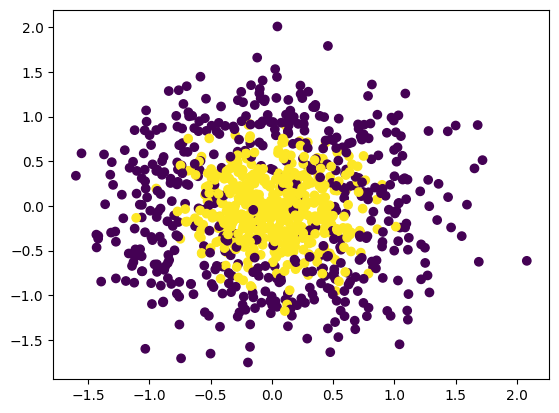

In [3]:
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.show()

In [4]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
x_min , x_max = X[:,0].min()-1 , X[:,0].max()+1
y_min , y_max = X[:,1].min()-1 , X[:,1].max()+1
print(x_min ,x_max)
xx , yy = np.meshgrid(np.arange(x_min , x_max ,0.1) , np.arange(y_min , y_max ,0.1))
xx.shape , yy.shape

-2.599195341064978 3.0806505169919687


((58, 57), (58, 57))

In [11]:
z= np.c_[xx.ravel() , yy.ravel()]

In [13]:
z.shape

(3306, 2)

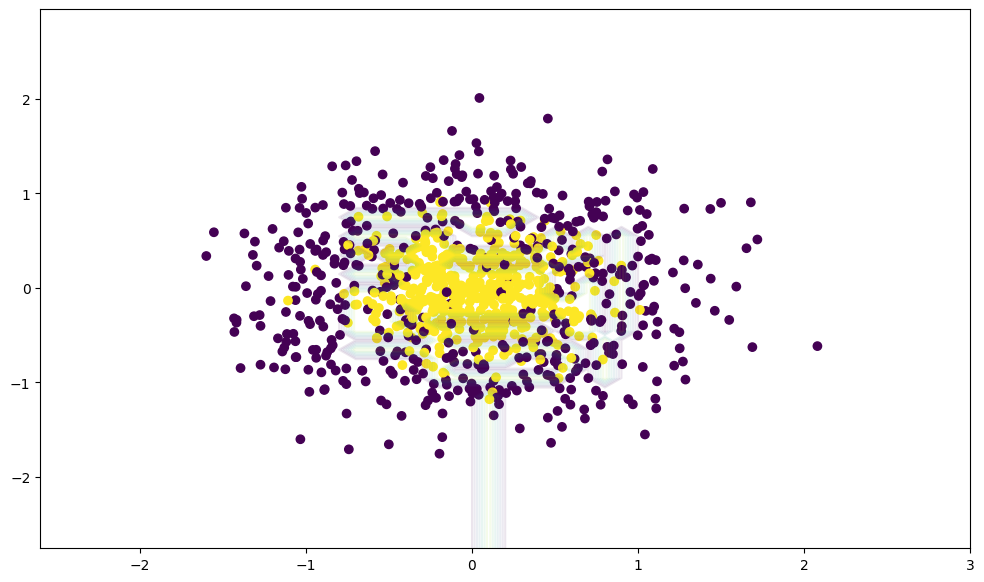

In [21]:
y_pred = dt.predict(z)
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(12,7))
plt.scatter(X[:,0] , X[:,1] , c=y )
plt.contour(xx, yy , y_pred  , alpha=0.1)
plt.show()

In [23]:
# Model is overfitting , this is the common issue with Decision Tree
# Random forest eliminate these issue 
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X ,y)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


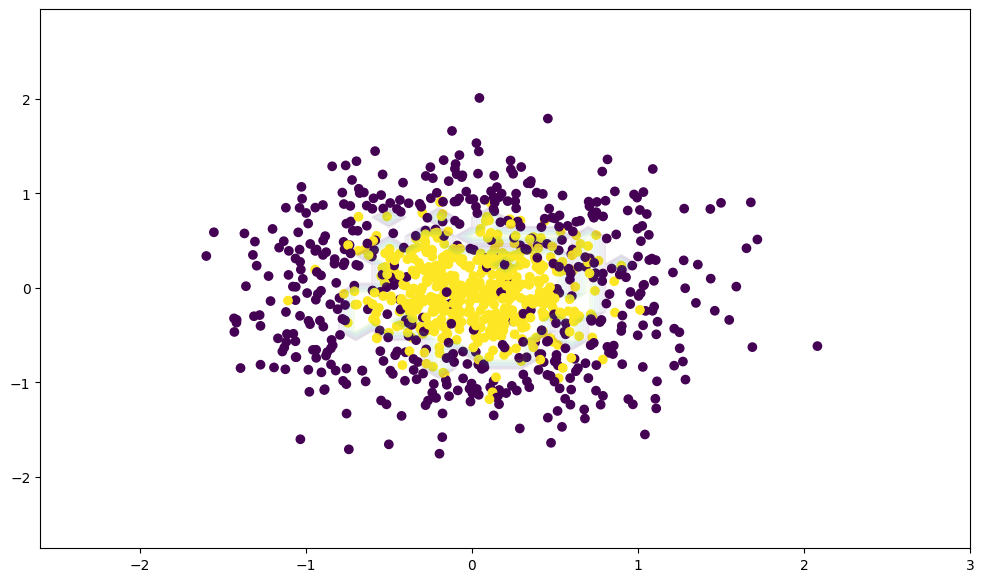

In [24]:
y_pred2 = rf.predict(z)
y_pred2 = y_pred2.reshape(xx.shape)
plt.figure(figsize=(12,7))
plt.scatter(X[:,0] , X[:,1] , c=y )
plt.contour(xx, yy , y_pred2  , alpha=0.1)
plt.show()

In [ ]:
# Now This time model is not overfitting i.e low biase , low variance model 

Decision Tree Regressor 

In [25]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

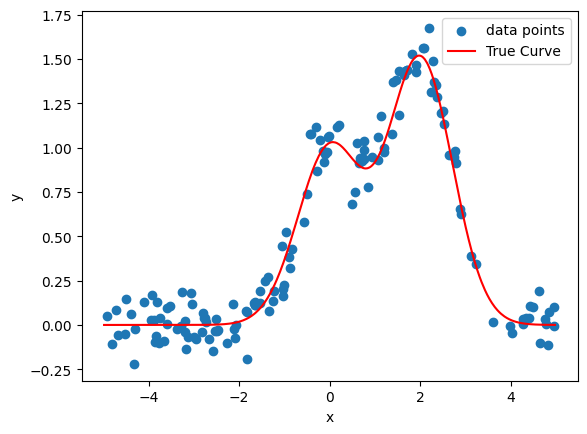

In [29]:
plt.scatter(X_train , y_train , label ='data points')
plt.plot(X_test , f(X_test) , c='r' , label='True Curve')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [30]:
dr = DecisionTreeRegressor()
dr.fit(X_train , y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


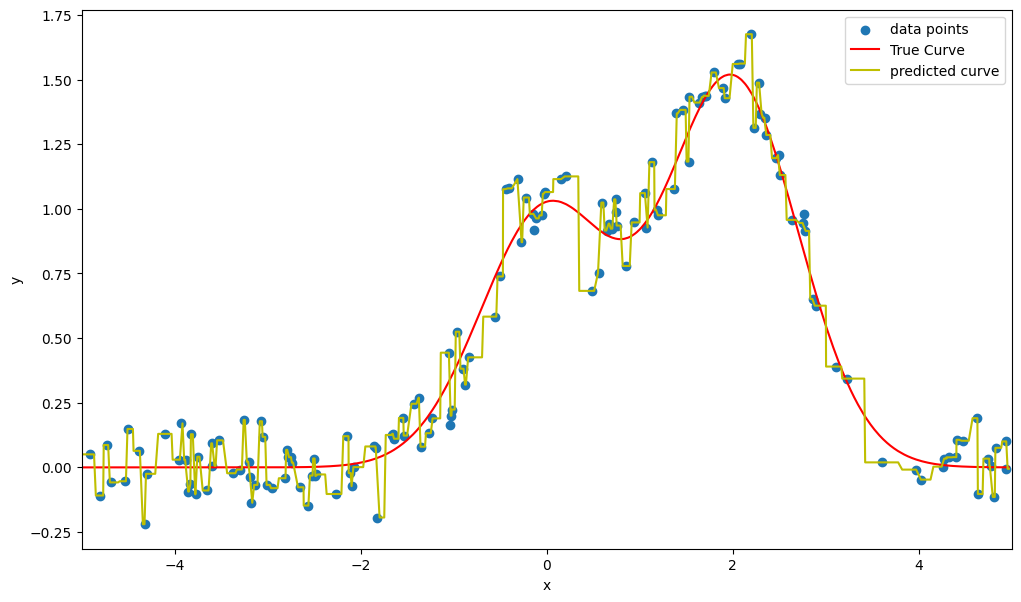

In [42]:
y_pred3 = dr.predict(X_test)
plt.figure(figsize=(12,7))
plt.scatter(X_train , y_train , label ='data points')
plt.plot(X_test , f(X_test) , c='r' , label='True Curve')
plt.plot(X_test , y_pred3 , c='y' , label = "predicted curve")
plt.legend()
plt.xlim(-5,5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [32]:
# Highly Overfiiting model , low biase and high variance

In [35]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train , y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


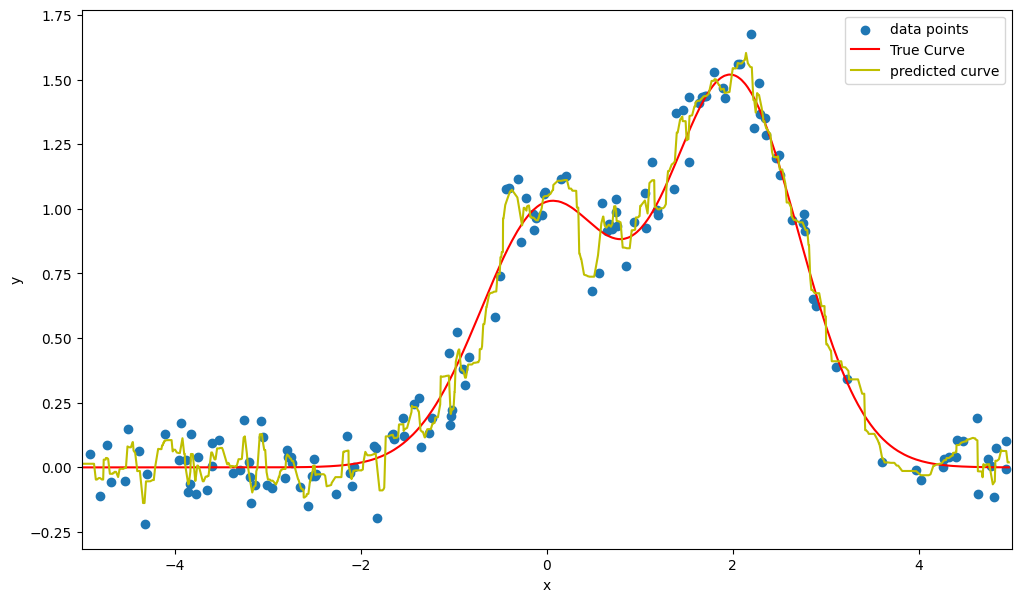

In [41]:
y_pred4 = rfr.predict(X_test)
plt.figure(figsize=(12,7))
plt.scatter(X_train , y_train , label ='data points')
plt.plot(X_test , f(X_test) , c='r' , label='True Curve')
plt.plot(X_test , y_pred4 , c='y' , label = "predicted curve")
plt.legend()
plt.xlim(-5,5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [37]:
# This time it is better than previuos one , low biase , low variance compared to previuos one

There is deference between bagging and Random Forest Algorithm \
one difference is that , in bagging base model can be any algorithm like DT , KNN , SVM. \
but supoose if we choose base model in bagging as Decision Tree then is bagging will become \
Random Forest ? The ans is No , lets see how \
Suppose in Bagging we pass max_features = 3 ( column sampling) then in each tree corresponding \
to filtered data(contains 3 column out of n column) for each model will use only these pre - \
selected column for splitting , so here column samplin happens at tree level . \
But in Random forest if max_features = 3 then it does not mean that each tree will be made on \
the basis of these 3 columns , but here at each node random 3 column will be selected and \
according to gini value the one will be used for splitting , so here in Random Forest column \
sampling happens at node level , but in bagging column sampling happen at tree level


In Random forest tree more than selected column can be used to make the tree , but in bagging \
entire tree for one model will use only selected columns 